In [1]:
import math
math.ceil(0.6)

1

In [1]:
# Add this project to the path
import os; import sys; currDir = os.path.dirname(os.path.realpath("__file__"))
rootDir = os.path.abspath(os.path.join(currDir, '..')); sys.path.insert(1, rootDir + "/src")

# Imports and options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Extract
df = pd.read_csv("../data/interim/train.csv")



In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,38,blue-collar,married,basic.9y,no,no,no,cellular,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0
1,36,entrepreneur,married,basic.9y,no,yes,no,cellular,apr,fri,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,0
2,33,admin.,single,university.degree,no,no,no,telephone,jun,mon,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,0
3,53,admin.,married,university.degree,unknown,yes,no,cellular,may,wed,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,0
4,56,blue-collar,single,basic.6y,unknown,no,no,telephone,jun,mon,3,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0


In [3]:
df['y'].value_counts(normalize=True)

0    0.887634
1    0.112366
Name: y, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24705 entries, 0 to 24704
Data columns (total 20 columns):
age               24705 non-null int64
job               24705 non-null object
marital           24705 non-null object
education         24705 non-null object
default           24705 non-null object
housing           24705 non-null object
loan              24705 non-null object
contact           24705 non-null object
month             24705 non-null object
day_of_week       24705 non-null object
campaign          24705 non-null int64
pdays             24705 non-null int64
previous          24705 non-null int64
poutcome          24705 non-null object
emp.var.rate      24705 non-null float64
cons.price.idx    24705 non-null float64
cons.conf.idx     24705 non-null float64
euribor3m         24705 non-null float64
nr.employed       24705 non-null float64
y                 24705 non-null int64
dtypes: float64(5), int64(5), object(10)
memory usage: 3.8+ MB


In [5]:
for column in df.select_dtypes("O").columns:
    print("\n", column, "\n\n", df[column].value_counts())


 job 

 admin.           6180
blue-collar      5630
technician       4006
services         2359
management       1738
retired          1005
entrepreneur      885
self-employed     856
unemployed        660
housemaid         647
student           537
unknown           202
Name: job, dtype: int64

 marital 

 married     15029
single       6918
divorced     2704
unknown        54
Name: marital, dtype: int64

 education 

 university.degree      7217
high.school            5768
basic.9y               3648
professional.course    3117
basic.4y               2509
basic.6y               1392
unknown                1044
illiterate               10
Name: education, dtype: int64

 default 

 no         19477
unknown     5226
yes            2
Name: default, dtype: int64

 housing 

 yes        12945
no         11156
unknown      604
Name: housing, dtype: int64

 loan 

 no         20298
yes         3803
unknown      604
Name: loan, dtype: int64

 contact 

 cellular     15687
telephone     9018


In [6]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,24705.000000,24705.000000,24705.000000,24705.000000,24705.000000,24705.000000,24705.000000,24705.000000,24705.000000,24705.000000
mean,39.943615,2.569116,962.385388,0.175106,0.079433,93.576027,-40.519733,3.617152,5166.950557,0.112366
std,10.345486,2.776065,187.129035,0.499210,1.572223,0.578769,4.615115,1.735820,72.248103,0.315823
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Duplicates are fine because clients can be messaged more than once.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1080f21d0>,
      dtype=object)

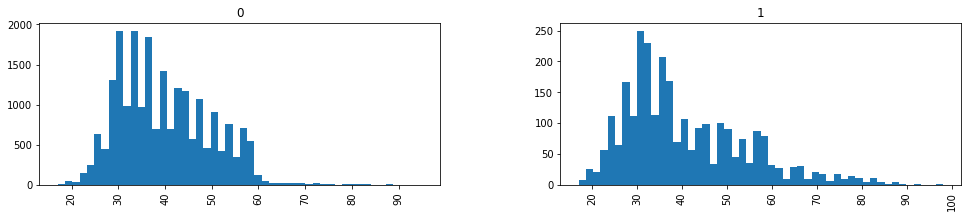

In [7]:
df.hist(column="age", by="y", figsize=(16,3), bins=50)

Clients older than 60 are much more likely to make the investment

In [8]:
# sns.pairplot(df, hue="y", diag_kind="hist")


Most separation:
- old age (60+): a yes more often than average
- 15+ contacts this campaign: very often a no
- pdays low: a large proportion of yes
- previous 2.0: possibly a large proportion of yes
- emp.var.rate < -1: more likely a yes 
- emp.var.rate > -1: more likely a no
- cons.price.index: possibly more yes for low values
- cons.conf.index: might be positively correlated with cons.price.index
- euibor3m low value: more likely a yes 
- euibor3m high value: more likely a no
- nr.employed low value: more likely a yes 
- nr.employed high value: more likely a no


In [9]:
temp = df.copy()
for col in ['default', 'housing', 'loan']:
    temp[col] = temp[col].apply(lambda x: 1 if x == "yes" else 0 if x == "unknown" else -1 if x =="no" else -2)
corr_matrix = temp.corr()
corr_matrix['y'].sort_values(ascending=False)

y                 1.000000
previous          0.225143
cons.conf.idx     0.050606
age               0.025181
housing           0.003120
loan             -0.009777
campaign         -0.064770
default          -0.096484
cons.price.idx   -0.137393
emp.var.rate     -0.295192
euribor3m        -0.304754
pdays            -0.322170
nr.employed      -0.350461
Name: y, dtype: float64

Comparing correlation to observations above:
- previous: correlation sign shows as expected, higher values are positively correlated 
- cons.conf.idx: opposite correlation was expected, perhaps there is a nonlinear relationship
- age: correlation sign shows as expected, small value.  Perhaps the greatest separation is among age 60+ which is a minority of the data.
- campaign: nothing of interest before, has one of the lowest absolute value correlations
- cons.price.idx, emp.var.rate, euribor3m, nr.employed have expected correlation sign, should see if some of these are correlated with each other and which can be removed
- pdays has the expected correlation sign
- default has a positive correlation

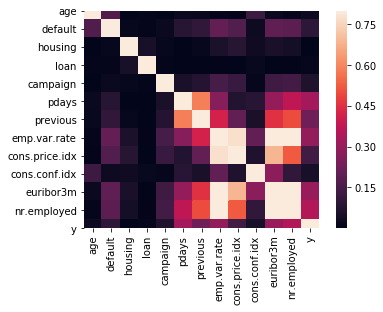

In [10]:
cor_mat = temp.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)


emp.var.rate, euribor3m, and nr.employed are highly correlated.  I prefer to drop all but the one highest correlated with y, which is nr.employed

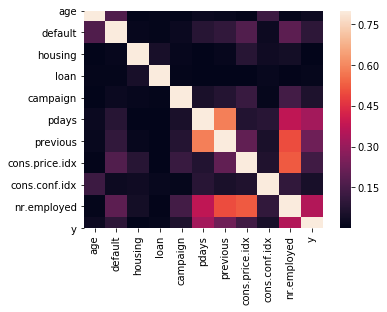

In [11]:
# Dropping columns (Added to pipeline as well)
df.drop(["euribor3m", "emp.var.rate"], axis=1, inplace=True)
temp.drop(["euribor3m", "emp.var.rate"], axis=1, inplace=True)

# Correlation
cor_mat = temp.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)


That's much better, no attributes are very highly correlated with each other.

Now I'll check some categorical variables that could easily be numeric variables.

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,38,blue-collar,married,basic.9y,no,no,no,cellular,jul,fri,1,999,0,nonexistent,93.918,-42.7,5228.1,0
1,36,entrepreneur,married,basic.9y,no,yes,no,cellular,apr,fri,2,999,1,failure,93.075,-47.1,5099.1,0
2,33,admin.,single,university.degree,no,no,no,telephone,jun,mon,2,999,0,nonexistent,94.465,-41.8,5228.1,0
3,53,admin.,married,university.degree,unknown,yes,no,cellular,may,wed,1,999,1,failure,92.893,-46.2,5099.1,0
4,56,blue-collar,single,basic.6y,unknown,no,no,telephone,jun,mon,3,999,0,nonexistent,94.465,-41.8,5228.1,0


In [13]:
def get_expected_bank_balance_by_age(age):
    balance = 0
    if age < 35:
        balance = 4000
    elif age <= 44:
        balance = 6000
    elif age <= 54:
        balance = 9000
    elif age <= 64:
        balance = 10000
    elif age <= 74:
        balance = 16000
    else:
        balance = 12000
    return balance

def get_education_level(education):
    education_level = 0
    if education == "illiterate":
        education_level = 0
    elif education == "basic.4y":
        education_level = 1
    elif education == "basic.6y":
        education_level = 2   
    elif education == "basic.9y":
        education_level = 3
    elif education == "high.school":
        education_level = 4
    elif education == "professional.course":
        education_level = 6      
    elif education == "university.degree":
        education_level = 8
    else:
        education_level = 4
    return education_level

def get_expected_income(job, age):
    beginner_income = 0
    expert_income = 0
    income = 0
    if job == 'admin.':
        beginner_income = 32500
        expert_income = 64000
    elif job == 'blue-collar':
        beginner_income = 22000
        expert_income = 50000
    elif job == 'technician':
        beginner_income = 25000
        expert_income = 55000   
    elif job == 'services':
        beginner_income = 34000
        expert_income = 55000   
        
    elif job == 'management':
        beginner_income = 45000
        expert_income = 122000   
    elif job == 'retired':
        beginner_income = 10000
        expert_income = 10000 
    elif job == 'entrepreneur':
        beginner_income = 25000
        expert_income = 50000 
    elif job == 'self-employed':
        beginner_income = 25000
        expert_income = 50000   
    elif job == 'housemaid':
        beginner_income = 19000
        expert_income = 30000         
    elif job == 'unemployed':
        beginner_income = 0
        expert_income = 0           
    elif job == 'student':
        beginner_income = 0
        expert_income = 0           
    elif job == 'unknown':
        beginner_income = 25000
        expert_income = 35000
    
    income_range = expert_income - beginner_income
    
    if age <= 19:
        income = beginner_income
    elif age <= 24:
        income = beginner_income + 0.22 * income_range
    elif age <= 34:
        income = beginner_income + 0.65 * income_range
    elif age <= 44:
        income = beginner_income + 0.97 * income_range
    elif age <= 54:
        income = beginner_income + 1.00 * income_range
    elif age <= 64:
        income = beginner_income + 0.99 * income_range
    else:
        income = beginner_income + 0.88 * income_range        
    return income
        

def get_expected_bank_balance_by_income(income):
    balance = 0
    if income < 25000:
        balance = 2500
    elif income < 45000:
        balance = 3500
    elif income < 70000:
        balance = 5000
    elif income < 115000:
        balance = 8000
    else:
        balance = 12000
    return balance
       

In [14]:
df['education_level'] = df['education'].apply(get_education_level)
df['expected_income'] = df[['job', 'age']].apply(lambda x: get_expected_income(*x), axis=1)
df['expected_bank_balance_by_income'] = df['expected_income'].apply(get_expected_bank_balance_by_income)
df['expected_bank_balance_by_age'] = df['age'].apply(get_expected_bank_balance_by_age)
df['age_gte_61'] = df['age'].apply(lambda x: 1 if x >= 61 else 0)
df['age_lte_23'] = df['age'].apply(lambda x: 1 if x <= 23 else 0)
df.drop(['expected_bank_balance_by_income'], axis=1, inplace=True)


y                               1.000000
nr.employed                     0.350461
pdays                           0.322170
previous                        0.225143
age_gte_61                      0.159551
cons.price.idx                  0.137393
age_lte_23                      0.074609
campaign                        0.064770
expected_income                 0.063634
education_level                 0.051759
cons.conf.idx                   0.050606
expected_bank_balance_by_age    0.032402
age                             0.025181
Name: y, dtype: float64

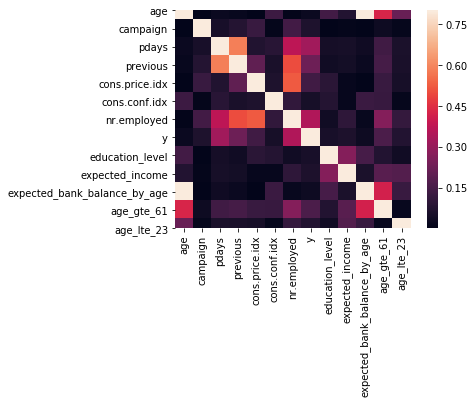

In [15]:
# Correlation
cor_mat = df.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)
cor_mat['y'].sort_values(ascending=False)

Dummies for all category variables:

In [16]:
df = pd.concat([df.select_dtypes(exclude="O"), \
           pd.get_dummies(df.select_dtypes(include="O"), drop_first=True)], axis=1)


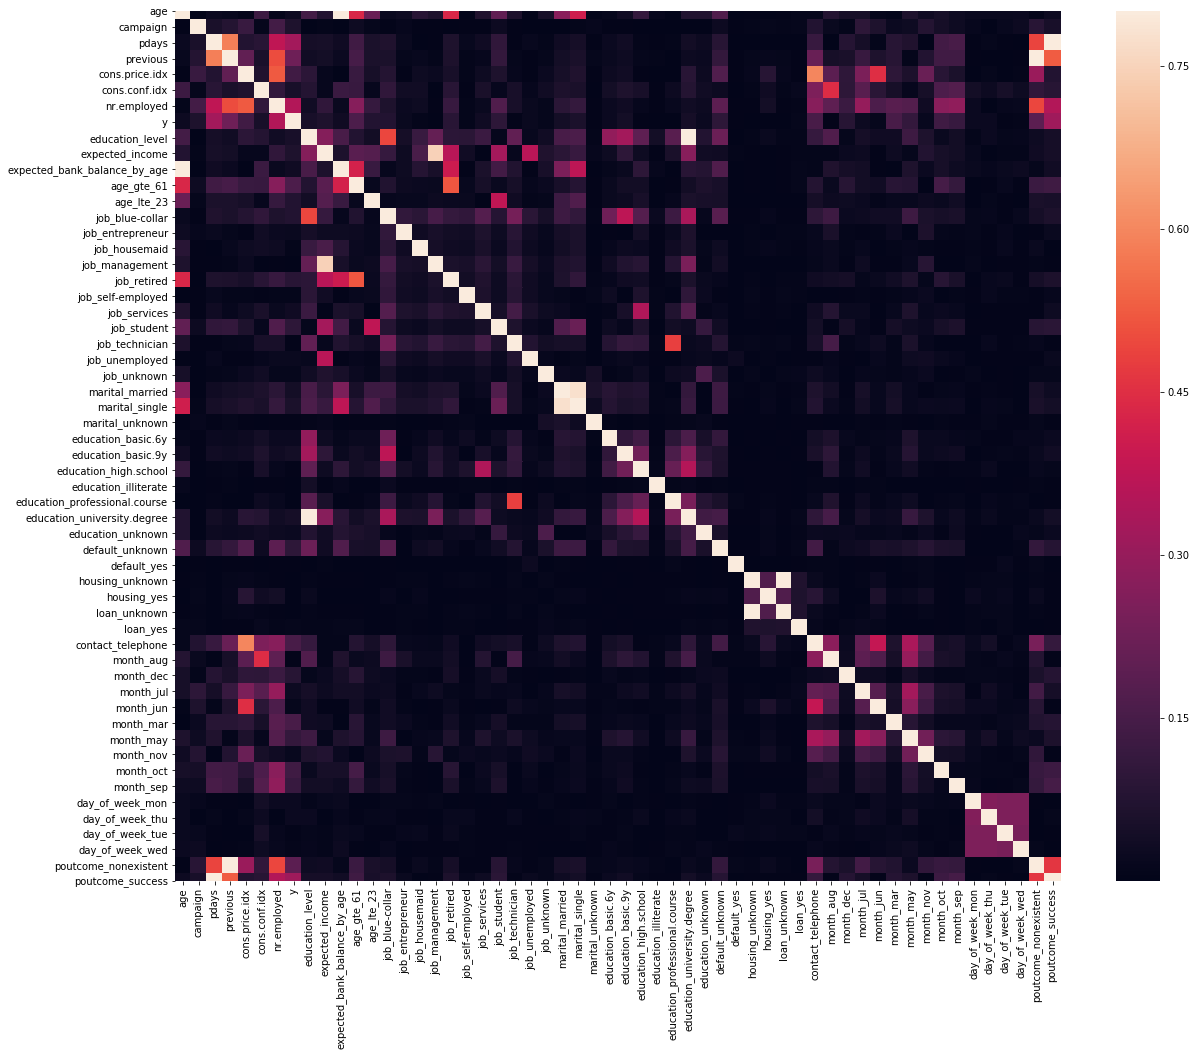

In [17]:
# Correlation
cor_mat = df.corr().apply(lambda x: abs(x))
plt.figure(figsize=(20, 16))
sns.heatmap(cor_mat, vmax=.8, square=True)


In [18]:
def get_loan_unknown_and_housing_unknown(loan_unknown, housing_unknown):
    return 1 if loan_unknown == 1 and housing_unknown == 1 else 0

df["loan_unknown_and_housing_unknown"] = \
    df[["loan_unknown", "housing_unknown"]].\
        apply(lambda x: get_loan_unknown_and_housing_unknown(*x), axis=1)
df.drop(["education_university.degree", "loan_unknown", "housing_unknown"], axis=1, inplace=True)

In [20]:
cor_mat = df.corr().apply(lambda x: abs(x))
cor_mat['y'].sort_values(ascending=False)

y                                   1.000000
nr.employed                         0.350461
pdays                               0.322170
poutcome_success                    0.316688
previous                            0.225143
poutcome_nonexistent                0.188728
age_gte_61                          0.159551
month_mar                           0.153039
contact_telephone                   0.152362
cons.price.idx                      0.137393
month_oct                           0.132280
month_sep                           0.116976
month_may                           0.106865
default_unknown                     0.096417
job_student                         0.095505
job_retired                         0.086986
month_dec                           0.082532
age_lte_23                          0.074609
job_blue-collar                     0.073521
campaign                            0.064770
expected_income                     0.063634
marital_single                      0.056990
education_

## Feature Importance

In [23]:
np.isnan(train).any().any()

NameError: name 'train' is not defined

In [24]:
from numpy.random import seed
from pandas import read_csv
import lightgbm as lgb
from xgboost import XGBClassifier

train = df.copy()
train.fillna(0, inplace=True)

X = train.drop(["y"], axis=1)
y = train[["y"]]

clf = lgb.LGBMClassifier()
clf = XGBClassifier()
clf.fit(X, y)

import shap
shap_values = shap.TreeExplainer(clf).shap_values(X[0:10000])



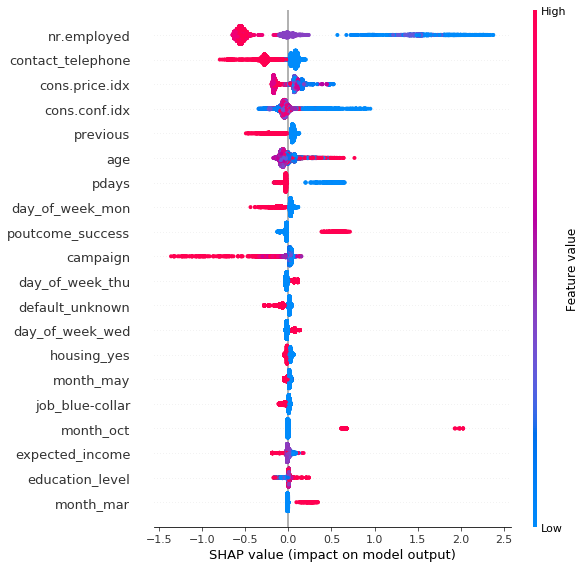

In [30]:
shap.summary_plot(shap_values, X[0:10000])

In [26]:
import pandas as pd
from numpy import cumsum
sorted_feature_importance = pd.DataFrame(shap_values, columns=X.columns).abs().sum().sort_values(ascending=False)
cumulative_sum = cumsum([y for (x,y) in sorted_feature_importance.reset_index().values])
gt_999_importance = cumulative_sum / cumulative_sum[-1] > .999
nth_feature = min([y for (x,y) in zip(gt_999_importance, zip(range(len(gt_999_importance)))) if x])[0]
important_columns = sorted_feature_importance.iloc[0:nth_feature+1].index.values.tolist()
important_columns

['nr.employed',
 'contact_telephone',
 'cons.price.idx',
 'cons.conf.idx',
 'previous',
 'age',
 'pdays',
 'day_of_week_mon',
 'poutcome_success',
 'campaign',
 'day_of_week_thu',
 'default_unknown',
 'day_of_week_wed',
 'housing_yes',
 'month_may',
 'job_blue-collar',
 'month_oct',
 'expected_income',
 'education_level',
 'month_mar',
 'month_jul',
 'marital_single',
 'education_basic.9y',
 'job_unknown',
 'month_aug',
 'job_technician',
 'month_nov',
 'marital_married',
 'month_dec',
 'job_services',
 'job_housemaid',
 'education_unknown',
 'job_student',
 'education_basic.6y',
 'job_unemployed',
 'job_self-employed',
 'education_high.school']

In [27]:
sorted_feature_importance

nr.employed                         5823.486328
contact_telephone                   1495.109131
cons.price.idx                      1228.209717
cons.conf.idx                        834.666138
previous                             741.575745
age                                  678.315002
pdays                                573.548889
day_of_week_mon                      510.294312
poutcome_success                     488.276245
campaign                             482.150970
day_of_week_thu                      333.484924
default_unknown                      285.398132
day_of_week_wed                      239.742050
housing_yes                          224.395050
month_may                            174.854843
job_blue-collar                      173.174255
month_oct                            169.181519
expected_income                      151.437927
education_level                      135.388397
month_mar                            121.356476
month_jul                            101

In [28]:
# xgboost says drop these:
*job_self-employed                      3.679979
*job_technician                         3.371524
*job_unemployed                         2.693683
*job_retired                            0.000000
*job_entrepreneur                       0.000000
*job_services                           0.000000
*job_management                         0.000000

*education_unknown                      0.000000
*education_professional.course          0.000000
*education_illiterate                   0.000000

*loan_yes                               1.619467
*poutcome_nonexistent                   0.000000
*month_sep                              0.000000
*default_yes                            0.000000




SyntaxError: invalid syntax (<ipython-input-28-f924d73d466f>, line 2)

In [ ]:
X = df.select_dtypes("O").head().values

In [ ]:
X[0,2]

In [ ]:
df.iloc[0]

In [ ]:
df.select_dtypes("O").head()

## Scratch Work

In [ ]:
from pandas import read_csv
train = read_csv("../data/interim/train.csv")
test = read_csv("../data/interim/test.csv")

num_attribs = train.select_dtypes(exclude="O").drop(["y"], axis=1)
cat_attribs = train.select_dtypes(include="O")

In [ ]:
num_attribs

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'a':[1,2,3,4], 'b':[10,20,30,40], 'c':[100,200,300,400], 'd':[-1,-2,-3,-4], 'e':[-10,-20,-30,-40] })
X = df.values
X[:, (1,3,4)]


In [ ]:
X[:, ~1]

In [ ]:
np.c_[np.delete(X, [0,2,3], 1)]

In [ ]:
np.delete(X, [0,2,3], 1)

In [ ]:
import numpy as np
from pandas import read_csv
from numpy.random import seed
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
                                  OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings("ignore")

def _get_education_level(education):
    education_level = 0
    if education == "illiterate":
        education_level = 0
    elif education == "basic.4y":
        education_level = 1
    elif education == "basic.6y":
        education_level = 2
    elif education == "basic.9y":
        education_level = 3
    elif education == "high.school":
        education_level = 4
    elif education == "professional.course":
        education_level = 6
    elif education == "university.degree":
        education_level = 8
    else:
        education_level = 4
    return education_level

def _get_expected_income(job, age):
    beginner_income = 0
    expert_income = 0
    income = 0
    if job == 'admin.':
        beginner_income = 32500
        expert_income = 64000
    elif job == 'blue-collar':
        beginner_income = 22000
        expert_income = 50000
    elif job == 'technician':
        beginner_income = 25000
        expert_income = 55000
    elif job == 'services':
        beginner_income = 34000
        expert_income = 55000

    elif job == 'management':
        beginner_income = 45000
        expert_income = 122000
    elif job == 'retired':
        beginner_income = 10000
        expert_income = 10000
    elif job == 'entrepreneur':
        beginner_income = 25000
        expert_income = 50000
    elif job == 'self-employed':
        beginner_income = 25000
        expert_income = 50000
    elif job == 'housemaid':
        beginner_income = 19000
        expert_income = 30000
    elif job == 'unemployed':
        beginner_income = 0
        expert_income = 0
    elif job == 'student':
        beginner_income = 0
        expert_income = 0
    elif job == 'unknown':
        beginner_income = 25000
        expert_income = 35000

    income_range = expert_income - beginner_income

    if age <= 19:
        income = beginner_income
    elif age <= 24:
        income = beginner_income + 0.22 * income_range
    elif age <= 34:
        income = beginner_income + 0.65 * income_range
    elif age <= 44:
        income = beginner_income + 0.97 * income_range
    elif age <= 54:
        income = beginner_income + 1.00 * income_range
    elif age <= 64:
        income = beginner_income + 0.99 * income_range
    else:
        income = beginner_income + 0.88 * income_range
    return income

def _get_loan_unknown_and_housing_unknown(loan_unknown, housing_unknown):
    return 1 if loan_unknown == 1 and housing_unknown == 1 else 0

# Not used in this project
def _run_feature_selection(train):
    import shap
    import pandas as pd
    from numpy import cumsum
    from xgboost import XGBClassifier

    seed(40)

    train.fillna(0, inplace=True)

    # X and y
    X = train.drop(["y"], axis=1)
    y = train[["y"]]

    # lightgbm for large number of columns
    # import lightgbm as lgb; clf = lgb.LGBMClassifier()

    # Fit xgboost
    clf = XGBClassifier()
    clf.fit(X, y)

    # shap values
    shap_values = shap.TreeExplainer(clf).shap_values(X[0:10000])

    sorted_feature_importance = pd.DataFrame(shap_values, columns=X.columns).abs().sum().sort_values(ascending=False)
    cumulative_sum = cumsum([y for (x,y) in sorted_feature_importance.reset_index().values])
    gt_999_importance = cumulative_sum / cumulative_sum[-1] > .999
    nth_feature = min([y for (x,y) in zip(gt_999_importance, zip(range(len(gt_999_importance)))) if x])[0]
    important_columns = sorted_feature_importance.iloc[0:nth_feature+1].index.values.tolist()
    important_columns
    return important_columns


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

a_age_ix, a_emp_var_rate_ix, a_euribor3m_ix = 0, 4, 7


class NewNumericAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_age_booleans=True):
        self.add_age_booleans = add_age_booleans
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.add_age_booleans:
            age_gte_61 = np.vectorize(lambda x: 1 if x >= 61 else 0)(X[:, a_age_ix])
            age_lte_23 = np.vectorize(lambda x: 1 if x <= 23 else 0)(X[:, a_age_ix])
            return np.c_[X, age_gte_61, age_lte_23]
        else:
            return np.c_[X]


class DropCorrelatedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, drop_indicators, drop_age):
        self.drop_indicators = drop_indicators
        self.drop_age = drop_age
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.drop_indicators and self.drop_age:
            new_X = np.delete(X, [a_age_ix, a_emp_var_rate_ix, a_euribor3m_ix], 1)
        elif self.drop_indicators:
            new_X = np.delete(X, [a_emp_var_rate_ix, a_euribor3m_ix], 1)
        elif self.drop_age:
            new_X = np.delete(X, [a_age_ix], 1)
        return np.c[new_X]


b_age_ix, b_job_ix, b_education_ix = 0, 1, 2

class NewHybridAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_income=True):
        self.add_income = add_income
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        education_level = np.vectorize(_get_education_level)(X[:, b_education_ix])
        if self.add_income:
            expected_income = np.vectorize(_get_expected_income)(X[:, b_job_ix], X[:, b_age_ix])
            return np.c_[education_level, expected_income]
        else:
            return np.c_[education_level]


c_job_ix, c_education_ix, c_default_ix = 0, 2, 3
c_loan_ix, c_month_ix, c_poutcome_ix = 5, 7, 9

class DropUnimportantCategoryValues(BaseEstimator, TransformerMixin):
    def __init__(self, drop=True):
        self.drop = drop
    def fit(self, X, y=None):
        self.first_value = [""]*10
        for ix in [c_job_ix, c_education_ix, c_default_ix, c_loan_ix,
                    c_month_ix, c_poutcome_ix]:
            self.first_value[ix] = X[0, ix]
        return self
    def transform(self, X, y=None):
        if not self.drop:
            return np.c_[X]
        else:
            jobs_to_ignore = ["self-employed", "technician", "unemployed",
                              "retired", "entrepreneur", "services",
                              "management"]
            education_to_ignore = ["unknown", "professional.course",
                                   "illiterate"]
            job = np.vectorize(lambda x: x if x not in jobs_to_ignore
                    else self.first_value[c_job_ix])(X[:, c_job_ix])
            education = np.vectorize(lambda x: x if x not in education_to_ignore \
                    else self.first_value[c_education_ix])(X[:, c_education_ix])
            education = np.vectorize(lambda x: x if x not in education_to_ignore \
                    else self.first_value[c_education_ix])(X[:, c_education_ix])
            default = np.vectorize(lambda x: x if x != "yes" \
                    else self.first_value[c_default_ix])(X[:, c_default_ix])
            loan = np.vectorize(lambda x: x if x != "yes" \
                    else self.first_value[c_loan_ix])(X[:, c_loan_ix])
            month = np.vectorize(lambda x: x if x != "sep" \
                    else self.first_value[c_month_ix])(X[:, c_month_ix])
            poutcome = np.vectorize(lambda x: x if x != "nonexistent" \
                    else self.first_value[c_poutcome_ix])(X[:, c_poutcome_ix])
            return np.c_[job, X[:, 1], education, default, X[:, 4],
                         loan, X[:, 6], month, X[:, 8], poutcome]

class LogXShape(BaseEstimator, TransformerMixin):
    def __init__(self, drop=True):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        print(X.shape)
        return X


def data_preparation():
    # Extract
    train = read_csv("../data/interim/train.csv", nrows=250)

    num_attribs = train.select_dtypes(exclude="O").drop(["y"], axis=1).columns
    hybrid_attribs = train[["age", "job", "education"]].columns
    cat_attribs = train.select_dtypes(include="O").columns

    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('new_numeric_attribs_adder', NewNumericAttributesAdder()),
        ('std_scaler', StandardScaler()),
        ('minmax_scaler', MinMaxScaler()),
    ])

    hybrid_pipeline = Pipeline([
        ('selector', DataFrameSelector(hybrid_attribs)),
        ('new_hybrid_attribs_adder', NewHybridAttributesAdder()),
        ('std_scaler', StandardScaler()),
        ('minmax_scaler', MinMaxScaler()),
    ])

    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('drop_unimportant_category_values', DropUnimportantCategoryValues()),
        ('cat_encoder', OneHotEncoder(drop='first')),
        # ('log_X_shape', LogXShape()),
    ])

    features_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("hybrid_pipeline", hybrid_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

    return features_pipeline


In [ ]:
# # Add this project to the path
# import os; import sys; currDir = os.path.dirname(os.path.realpath("__file__"))
# rootDir = os.path.abspath(os.path.join(currDir, '..')); sys.path.insert(1, rootDir + "/src/")

# # Warnings
# import warnings
# warnings.filterwarnings("ignore")

# # My modules
# from models.train_model import *
# from features.build_features import *

# Public modules
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import precision_recall_curve, confusion_matrix, \
                            precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Extract
seed(40)
train = read_csv("../data/interim/train.csv")
train_y = train[["y"]].values

# Data parameters
features_pipeline = data_preparation()

# Model parameters
full_pipeline = Pipeline([
    ("features", features_pipeline),
    ("clf", LogisticRegression(random_state=1)),
])

# TESTING THIS NEW CODE:
# TESTING THIS NEW CODE:
# TESTING THIS NEW CODE:
# TESTING THIS NEW CODE:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        if i == 1:
            idx = np.arange(n * (i - 1) / 2, n-15, dtype=int)
            yield idx, idx
        if i == 2:
            idx = np.arange(n - 15, n, dtype=int)
            yield idx, idx
        i += 1
custom_cv = custom_cv_2folds(train)

# Learning curve
train_sizes, train_scores, test_scores = \
    learning_curve(estimator=full_pipeline,
                   X=train,
                   y=train_y,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=custom_cv,
                   n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.875, 0.925])
plt.show()















# Fit
full_pipeline.fit(train, train_y)

# Predict
precision_threshold = 0.20
prob_y = full_pipeline.predict_proba(train)[:, 1]
precision, recall, _ = precision_recall_curve(train_y, prob_y, pos_label=1)
score = max([y for (x,y) in zip(precision, recall) if x >= precision_threshold])
print('Recall score: %.3f' % score)


# Error analysis
if SHOW_ERROR_ANALYSIS:
    precision_threshold_index = min([i for (x,i) in zip(precision, range(len(precision))) if x >= precision_threshold])
    train["prob_y"] = prob_y
    prob_y_threshold = train.sort_values("prob_y", ascending=False).iloc[len(precision) - precision_threshold_index].prob_y
    pred_y = (prob_y >= prob_y_threshold).astype(bool)
    print("Prob y Threshold: %.1f" % (prob_y_threshold*100))
    print(confusion_matrix(train_y, pred_y))
    print("Recall: %.1f" % (recall_score(train_y, pred_y)*100))
    print("Precision: %.1f" % (precision_score(train_y, pred_y)*100))


In [25]:
(np.linspace(0.1, 1.0, 10)*train.shape[0]).astype(int)

array([ 2470,  4941,  7411,  9882, 12352, 14823, 17293, 19764, 22234,
       24705])

In [20]:
np.mean(train_scores, axis=1)

array([0.94714459, 0.95210612, 0.95301742, 0.95200486, 0.95038477,
       0.94987849, 0.95050049, 0.95033414, 0.95022726, 0.9499595 ])

In [18]:
train_sizes, train_scores, test_scores

(array([ 2469,  4938,  7407,  9876, 12345, 14814, 17283, 19752, 22221,
        24690]), array([[0.89428919, 1.        ],
        [0.90421223, 1.        ],
        [0.90603483, 1.        ],
        [0.90400972, 1.        ],
        [0.90076954, 1.        ],
        [0.89975699, 1.        ],
        [0.90100098, 1.        ],
        [0.90066829, 1.        ],
        [0.90045452, 1.        ],
        [0.899919  , 1.        ]]), array([[0.89773188, 1.        ],
        [0.90056703, 1.        ],
        [0.89943297, 1.        ],
        [0.90020251, 1.        ],
        [0.89987849, 1.        ],
        [0.89979749, 1.        ],
        [0.90012151, 1.        ],
        [0.900081  , 1.        ],
        [0.900081  , 1.        ],
        [0.899919  , 1.        ]]))

In [19]:
train.shape

(24705, 20)